# **Gradient Descent**
1. Numpy version
2. Pytorch version + Optimize

In [10]:
import numpy as np

# f=w*x

# f=2*x
X=np.array([1,2,3,4],dtype=np.float32)
Y=np.array([2,4,6,8],dtype=np.float32)

w=0.0

# module prediction
def forward(x):
  return w*x

# loss
def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient
# MSE = 1/N*(w*x-y)**2
# dJ/dw = 1/N 2x (w*x-y)
def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  dw=gradient(X,Y,y_pred)

  # update weights
  w-=learning_rate*dw

  if epoch % 2 ==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050331
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [14]:
# 1) Design model (input, output_size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#   - forward pass : compute prediction
#   - backward pass : gradients
#   - update weights
import torch
import torch.nn as nn

# f=w*x

# f=2*x
X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

X_test=torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features) # 4,1

input_size=n_features
output_size=n_features

# model=nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    # define layers
    self.lin=nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model=LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  l.backward() # dl/dw

  # update weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if epoch % 10 ==0:
    [w,b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

4 1
Prediction before training: f(5) = 4.666
epoch 1: w = 1.028, loss = 7.92728043
epoch 11: w = 1.676, loss = 0.26208070
epoch 21: w = 1.785, loss = 0.06044684
epoch 31: w = 1.808, loss = 0.05210642
epoch 41: w = 1.816, loss = 0.04894881
epoch 51: w = 1.822, loss = 0.04609649
epoch 61: w = 1.827, loss = 0.04341338
epoch 71: w = 1.832, loss = 0.04088645
epoch 81: w = 1.837, loss = 0.03850665
epoch 91: w = 1.842, loss = 0.03626533
Prediction after training: f(5) = 9.683


# **Linear Regression**

epoch: 10, loss=4429.7227
epoch: 20, loss=3302.6260
epoch: 30, loss=2487.5837
epoch: 40, loss=1897.5450
epoch: 50, loss=1469.9553
epoch: 60, loss=1159.7943
epoch: 70, loss=934.6144
epoch: 80, loss=770.9994
epoch: 90, loss=652.0285
epoch: 100, loss=565.4604


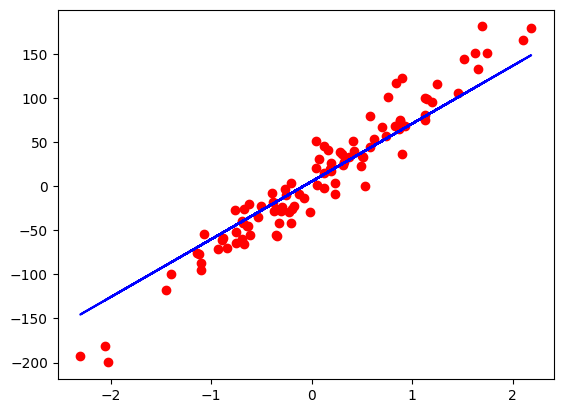

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# prepare data
X_numpy, y_numpy=datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0], 1)

n_samples, n_features=X.shape

# model
input_size=n_features
output_size=1
model=nn.Linear(input_size, output_size)

# Loss and Optimizer
learning_rate=0.01
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
epochs=100
for epoch in range(epochs):
  # forward pass and loss
  y_predicted=model(X)
  loss=criterion(y_predicted, y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if(epoch+1)%10==0:
    print(f'epoch: {epoch+1}, loss={loss.item():.4f}')

# plot
predicted=model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# **Logistic Regression**

In [18]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# prepare data
bc = datasets.load_breast_cancer()
X, y=bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32)) # convert to tensor
X_test = torch.from_numpy(X_test.astype(np.float32)) # convert to tensor
y_train = torch.from_numpy(y_train.astype(np.float32)) # convert to tensor
y_test = torch.from_numpy(y_test.astype(np.float32)) # convert to tensor

y_train=y_train.view(y_train.shape[0], 1)
y_test=y_test.view(y_test.shape[0], 1)

# model
# f=wx+b, sigmoid at the end
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear=nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted=torch.sigmoid(self.linear(x))
    return y_predicted

model=LogisticRegression(n_features)

# Loss and Optimizer
learning_rate=0.01
criterion = nn.BCELoss() # Binary CrossEntropy
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate) # Stochastic Gradient Descent

# training loop
epochs=100
for epoch in range(epochs):
  # forward pass and loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  # backward pass
  loss.backward()

  # updates
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if (epoch+1) % 10 ==0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0]) # divide by number of samples
  print(f'accuracy = {acc:.4f}')

epoch: 10, loss = 0.5603
epoch: 20, loss = 0.4657
epoch: 30, loss = 0.4054
epoch: 40, loss = 0.3633
epoch: 50, loss = 0.3319
epoch: 60, loss = 0.3075
epoch: 70, loss = 0.2877
epoch: 80, loss = 0.2713
epoch: 90, loss = 0.2574
epoch: 100, loss = 0.2455
accuracy = 0.9123


# **Datasets and DataLoader**

In [28]:
'''
epoch = 1 forward and backward pass of ALL training samples

batch_size = number of training samples in one forward & backward pass

number of iterations = number of passes, each pass using [batch_size] number of samples

e.g. 100 samples, batch_size=20 -> 100/20 = 5 iterations for 1 epoch
'''

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  def __init__(self):
    # data loading
    xy=np.loadtxt("/content/sample_data/wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
    self.n_samples = xy.shape[0]

  def __getitem__(self, index):
    # dataset[0]
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples

dataset = WineDataset()
dataloader=DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

# training loop
epochs = 2
total_samples=len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    # forward backward, update
    if (i+1)%5==0:
      print(f'epoch {epoch+1}/{epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

178 45
epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


# **Softmax and CrossEntropy**

In [31]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # along values along first axis
print('softmax torch:', outputs)

# Cross entropy
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

# CrossEntropyLoss in PyTorch (applies Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss
loss = nn.CrossEntropyLoss()
# loss(input, target)

Y = torch.tensor([0])

Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')

Y = torch.tensor([2, 0, 1])

Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406
Actual class: 0, Y_pred1: 0, Y_pred2: 1
Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


# **Activation Function**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Option1 (Create nn modules)
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu=nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out=self.linear1(x)
    out=self.relu(out)
    out=self.linear2(out)
    out=self.sigmoid(out)
    return out

  # Option2 (use activation functions directly in forward pass)
  class NeuralNet(nn.Module):
    def _init__(self, input_size, hidden_size):
      super(NeuralNet, self).__init__()
      self.linear1=nn.Linear(input_size, hidden_size)
      self.linear2=nn.LInear2(hidden_size, 1)

    def forward(self, x):
      out=torch.relu(self.linear1(x))
      out=torch.sigmoid(self.linear2(x))
      return out

# **Feedforward Network**

epoch 1 / 2, step 100/600, loss = 0.4115
epoch 1 / 2, step 200/600, loss = 0.3972
epoch 1 / 2, step 300/600, loss = 0.4999
epoch 1 / 2, step 400/600, loss = 0.3153
epoch 1 / 2, step 500/600, loss = 0.1962
epoch 1 / 2, step 600/600, loss = 0.2467
epoch 2 / 2, step 100/600, loss = 0.2891
epoch 2 / 2, step 200/600, loss = 0.2626
epoch 2 / 2, step 300/600, loss = 0.1398
epoch 2 / 2, step 400/600, loss = 0.1148
epoch 2 / 2, step 500/600, loss = 0.1588
epoch 2 / 2, step 600/600, loss = 0.2588
accuracy = 0.93


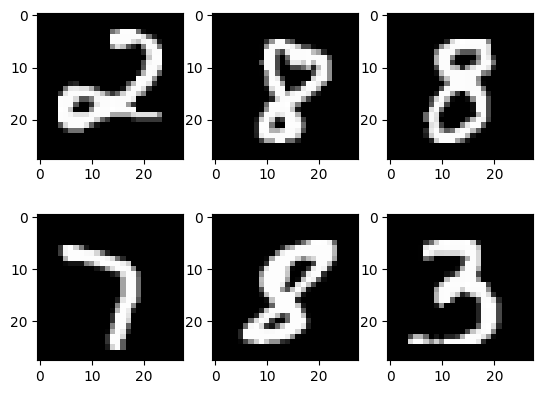

In [34]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,
                                           shuffle=False)

samples, labels = next(iter(train_loader))

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1=nn.Linear(input_size, hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    return out

model=NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterino=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps=len(train_loader)
for epoch in range(epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # update parameters

    if (i+1)%100 == 0:
      print(f'epoch {epoch+1} / {epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

# test
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs=model(images)

    # value, index
    _, predictions=torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct = (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')

# **Convolutional Neural Network**

100%|██████████| 170498071/170498071 [00:03<00:00, 42913824.88it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


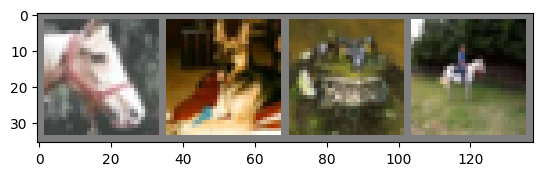

Epoch [1/5], Step [2000/12500], Loss: 2.3436
Epoch [1/5], Step [4000/12500], Loss: 2.2756
Epoch [1/5], Step [6000/12500], Loss: 2.2983
Epoch [1/5], Step [8000/12500], Loss: 2.3225
Epoch [1/5], Step [10000/12500], Loss: 2.4342
Epoch [1/5], Step [12000/12500], Loss: 1.6080
Epoch [2/5], Step [2000/12500], Loss: 2.0775
Epoch [2/5], Step [4000/12500], Loss: 2.0054
Epoch [2/5], Step [6000/12500], Loss: 1.6405
Epoch [2/5], Step [8000/12500], Loss: 1.6372
Epoch [2/5], Step [10000/12500], Loss: 2.4282
Epoch [2/5], Step [12000/12500], Loss: 1.1543
Epoch [3/5], Step [2000/12500], Loss: 1.6902
Epoch [3/5], Step [4000/12500], Loss: 1.7996
Epoch [3/5], Step [6000/12500], Loss: 1.7409
Epoch [3/5], Step [8000/12500], Loss: 1.1302
Epoch [3/5], Step [10000/12500], Loss: 1.6449
Epoch [3/5], Step [12000/12500], Loss: 1.2460
Epoch [4/5], Step [2000/12500], Loss: 1.4412
Epoch [4/5], Step [4000/12500], Loss: 1.5785
Epoch [4/5], Step [6000/12500], Loss: 1.4887
Epoch [4/5], Step [8000/12500], Loss: 1.4624
Epoc

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

# **Tensorboard**

Epoch [1/1], Step [100/938], Loss: 0.3167
Epoch [1/1], Step [200/938], Loss: 0.4147
Epoch [1/1], Step [300/938], Loss: 0.2694
Epoch [1/1], Step [400/938], Loss: 0.3459
Epoch [1/1], Step [500/938], Loss: 0.2057
Epoch [1/1], Step [600/938], Loss: 0.3343
Epoch [1/1], Step [700/938], Loss: 0.0926
Epoch [1/1], Step [800/938], Loss: 0.2425
Epoch [1/1], Step [900/938], Loss: 0.1345
Accuracy of the network on the 10000 test images: 96.12 %


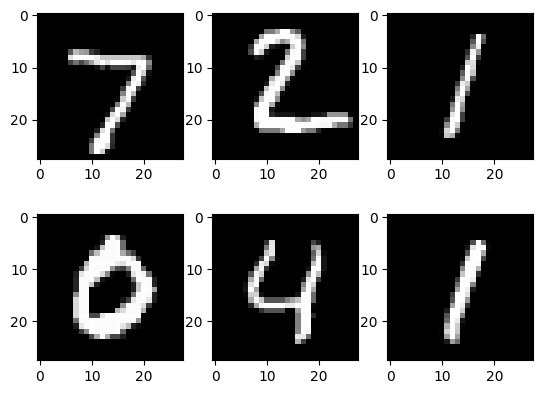

In [38]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

############## TENSORBOARD ########################
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/mnist1')
###################################################

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 1
batch_size = 64
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
#plt.show()

############## TENSORBOARD ########################
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
#writer.close()
#sys.exit()
###################################################

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

############## TENSORBOARD ########################
writer.add_graph(model, example_data.reshape(-1, 28*28).to(device))
#writer.close()
#sys.exit()
###################################################

# Train the model
running_loss = 0.0
running_correct = 0
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            ############## TENSORBOARD ########################
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0
            ###################################################

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
class_labels = []
class_preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        values, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        class_probs_batch = [F.softmax(output, dim=0) for output in outputs]

        class_preds.append(class_probs_batch)
        class_labels.append(labels)

    # 10000, 10, and 10000, 1
    # stack concatenates tensors along a new dimension
    # cat concatenates tensors in the given dimension
    class_preds = torch.cat([torch.stack(batch) for batch in class_preds])
    class_labels = torch.cat(class_labels)

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    ############## TENSORBOARD ########################
    classes = range(10)
    for i in classes:
        labels_i = class_labels == i
        preds_i = class_preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()
    ###################################################